In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
from scipy.sparse import diags
from functools import lru_cache

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
# import dataframe_image as dfi
from functools import lru_cache

# Energy per Information Bit

## BPPM

In [2]:
comb_cache = {}

@lru_cache(maxsize=None)

def compute_N(n_BPPM):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n_BPPM]
    
def EpI_BPPM(n_BPPM):
    N_n = compute_N(n_BPPM)
    factorial_n = math.factorial(n_BPPM)
    codeword = np.log2(float(factorial_n))
    EpI_BPPM = n_BPPM / codeword
    return EpI_BPPM

def codeword_PPM(EpI_BPPM):
    n_PPM = 1
    codeword_PPM = 2**(n_PPM/EpI_BPPM)
    return codeword_PPM

def codeword_TimeBin_General(n_General, EpI_BPPM):
    factorial_n = math.factorial(n_General)
    codeword_General = 2**(n_General/EpI_BPPM)
    Timebin = factorial_n * codeword_General + n_General - 1
    return Timebin

In [3]:
def combinatorial(n, M):
    result = math.factorial(M) / (math.factorial(M-n) * math.factorial(n))
    return result

In [4]:
11 / np.log2(math.factorial(11)), 2 **(np.log2(math.factorial(11)) / 11), 1 / np.log2(5), 11 / np.log2(combinatorial(11, 30))

(0.43563506329006085,
 4.909238779584395,
 0.43067655807339306,
 0.42796362935716703)

In [5]:
combinatorial(14, 44)

114955808528.0

In [6]:
2** (19/0.33)


2.147979110144028e+17

In [7]:
14 / np.log2(math.factorial(14)), 1 / np.log2(6), 14 / np.log2(combinatorial(14, 44))

(0.38521596303114397, 0.38685280723454163, 0.3810323364806397)

In [8]:
combinatorial(19, 74)

2.1417813293175286e+17

In [9]:
19 / np.log2(math.factorial(19)), 2 **(np.log2(math.factorial(19)) / 19), 1 / np.log2(8), 19 / np.log2(combinatorial(19, 74))

(0.3347695780691744, 7.92894684486515, 0.3333333333333333, 0.33002389536870935)

In [10]:
compute_N(5)

26

In [11]:
EpI_BPPM(5)

0.7239147530697906

In [12]:
codeword_PPM(EpI_BPPM(5))

2.605171084697352

In [13]:
codeword_TimeBin_General(2, EpI_BPPM(5))

14.573832761086356

In [14]:
df_EpI_BPPM = pd.DataFrame(columns=['Energy per Information_BPPM',
                                    'Photon Number_BPPM', 
                                    'Time Bin_BPPM',
                                    'Number of Codeword for PPM',
                                    'Number of Codeword for General']
                                 )

for n_BPPM in range(2,51):
    N_n = compute_N(n_BPPM)
    EpI_BPPM_val = EpI_BPPM(n_BPPM)
    codeword_PPM_val = codeword_PPM(EpI_BPPM(n_BPPM))
    codeword_TimeBin_General_val = codeword_TimeBin_General(2, EpI_BPPM(n_BPPM))
    

    
    df_EpI_BPPM.loc[n_BPPM-1] = [EpI_BPPM_val, n_BPPM, N_n, codeword_PPM_val, codeword_TimeBin_General_val]
    

In [15]:
# df_EpI_BPPM = df_EpI_BPPM.set_index('Energy per Information_BPPM')
# df_EpI_BPPM

PPM should be straight line, that does not make sense

BPPM, should have a slope

starting with the General, keep energy per bit constant
4.4 time bin


In [16]:
def combination_G(M, n):
    # if (M_G, n_General) in comb_cache:
    #     return comb_cache[(M_G, n_General)]
    # else:
        comb = math.factorial(M) // (math.factorial(M-n) * math.factorial(n))
        # comb_cache[(M_G, n_General)] = comb
        return comb

In [17]:
M = 4
n_General = 2 

combination_G(M, n_General)

6

## PPM and General

In [18]:
df_EpI = pd.DataFrame(columns=[ 
                                 'Time Bin_PPM and G',
                                 'Energy per Information_G for n = 2',
                                 'Energy per Information_G for n = 3',
                                 'Energy per Information_PPM',
                                 'Wrong Value (n is 2 but M over 3)'
                                 ]
                                 )

for M in range(3,51):
    n_General_2 = 2
    n_General_3 = 3
    n_PPM = 1
    codeword_G_2 = combination_G(M, n_General_2)
    codeword_G_3 = combination_G(M, n_General_3)
    EpI_G_2 = n_General_2 / np.log2(float(codeword_G_2))
    EpI_G_3 = n_General_3 / np.log2(float(codeword_G_3))
    EpI_PPM = n_PPM / np.log2(float(M))
    wrong_val = n_General_3 / np.log2(float(codeword_G_2))
    df_EpI.loc[M-1] = [M, EpI_G_2, EpI_G_3, EpI_PPM, wrong_val]
    

/var/folders/8m/0wg1hssn6n79tjc8mh6p_spr0000gn/T/ipykernel_1108/2765954463.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  EpI_G_3 = n_General_3 / np.log2(float(codeword_G_3))


In [19]:
n_General_3 / np.log2(float(combination_G(3, 3)))

/var/folders/8m/0wg1hssn6n79tjc8mh6p_spr0000gn/T/ipykernel_1108/469510675.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  n_General_3 / np.log2(float(combination_G(3, 3)))


inf

## First comparision: 0.4343

General
 n= 3, M = 10

PPM
n = 1, M = 5

BPPM
n = 11, M = 332

In [20]:
n_General_3 / np.log2(float(combination_G(10, 3)))

0.4343488518418744

In [21]:
1 / np.log2(float(5))

0.43067655807339306

In [22]:
11 / np.log2(float(math.factorial(11)))

0.43563506329006085

## Second Comparison: 0.39

General:
n = 3, M = 12

PPM:
n = 1, M = 6

BPPM:
n = 14, M = 791

In [23]:
n_General_3 / np.log2(float(combination_G(12, 3)))

0.3855367327108329

In [24]:
1 / np.log2(float(6))

0.38685280723454163

In [25]:
14 / np.log2(float(math.factorial(14)))

0.38521596303114397

In [26]:
display(df_EpI)

,Time Bin_PPM and G,Energy per Information_G for n = 2,Energy per Information_G for n = 3,Energy per Information_PPM,Wrong Value (n is 2 but M over 3)
2,3.0,1.261860,inf,0.630930,1.892789
3,4.0,0.773706,1.500000,0.500000,1.160558
4,5.0,0.602060,0.903090,0.430677,0.903090
5,6.0,0.511916,0.694135,0.386853,0.767874
6,7.0,0.455340,0.584877,0.356207,0.683011
7,8.0,0.416029,0.516586,0.333333,0.624044
8,9.0,0.386853,0.469313,0.315465,0.580279
9,10.0,0.364176,0.434349,0.301030,0.546264
10,11.0,0.345939,0.407259,0.289065,0.518909
11,12.0,0.330885,0.385537,0.278943,0.496328


In [27]:
df_concat = pd.concat([df_EpI, df_EpI_BPPM.iloc[:, :3]], axis=1)

In [28]:
df_concat = df_concat.set_index('Time Bin_PPM and G')
df_concat

,Energy per Information_G for n = 2,Energy per Information_G for n = 3,Energy per Information_PPM,Wrong Value (n is 2 but M over 3),Energy per Information_BPPM,Photon Number_BPPM,Time Bin_BPPM
Time Bin_PPM and G,,,,,,,
3.0,1.261860,inf,0.630930,1.892789,1.160558,3.0,7.0
4.0,0.773706,1.500000,0.500000,1.160558,0.872417,4.0,14.0
5.0,0.602060,0.903090,0.430677,0.903090,0.723915,5.0,26.0
6.0,0.511916,0.694135,0.386853,0.767874,0.632121,6.0,46.0
7.0,0.455340,0.584877,0.356207,0.683011,0.569142,7.0,75.0
8.0,0.416029,0.516586,0.333333,0.624044,0.522903,8.0,113.0
9.0,0.386853,0.469313,0.315465,0.580279,0.487300,9.0,165.0
10.0,0.364176,0.434349,0.301030,0.546264,0.458904,10.0,238.0
11.0,0.345939,0.407259,0.289065,0.518909,0.435635,11.0,332.0


In [29]:
# df_concat.to_excel('epi_updated.xlsx', index=False)

## Mutual Information for Constant Energy per Information Bit

First costant energy constant per infroamtion bit:
<br>General protocol for 2 photons: 0.386 with 9 Time Bins 
<br>General protocol for 3 photons: 0.385 with 11 Time Bins
<br>PPM protocol:                   0.386 with 6 Time Bins
<br>BPPM protocol:                  0.385215 with 14 photons and 791 Time Bins

n_General = 2, T_General = 9, n_General = 3, T_General = 11, M = 6, n_BPPM = 14, compute_N(n) = 791

## BPPM

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
from scipy.sparse import diags
from functools import lru_cache
import pandas as pd
from pandas.plotting import table
# import dataframe_image as dfi
import scipy.sparse as sps
from scipy.special import comb as combination

In [31]:
comb_cache = {}
comb_n_cache = {}
comb_n_M_minus_n_cache = {}

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N

def combination(n, r):
    if (n, r) in comb_cache:
        return comb_cache[(n, r)]
    else:
        comb = math.factorial(n) // (math.factorial(n-r) * math.factorial(r))
        comb_cache[(n, r)] = comb
        return comb
    
@lru_cache(maxsize=None)
def compute_N(n):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n]

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute(n, P_l, l):
    if (n, l) in comb_n_cache:
        comb_n = comb_n_cache[(n, l)]
    else:
        comb_n = combination(n, l)
        comb_n_cache[(n, l)] = comb_n

    return comb_n * (P_l)**l * (1 - P_l)**(n - l)


def Add_Distribute(n, P_a, a):
    N_n = compute_N(n)
    M_minus_n = compute_N(n) - N_n
    if (N_n, M_minus_n, a) in comb_n_M_minus_n_cache:
        comb_Nn_Mn = comb_n_M_minus_n_cache[(N_n, M_minus_n, a)]
    else:
        comb_Nn_Mn = combination(N_n + M_minus_n, a)
        comb_n_M_minus_n_cache[(N_n, M_minus_n, a)] = comb_Nn_Mn

    return comb_Nn_Mn * (P_a)**a * (1 - P_a)**(M_minus_n - a)

# define a separate function for computing the probability of error
def P_err(n, P_l, P_a,l,a):
  return Loss_Distribute(n,P_l,l) * Add_Distribute(n,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

# We put these into P_D for re-normalization, These are the probability of error we can correct
# define separate functions for computing the probability of success
def P_Success0(n,P_l,P_a,l,a):
  return P_err(n,P_l, P_a,0,0)

def P_Success1(n,P_l,P_a,l,a):
  P0 = P_Success0(n, P_l, P_a,l,a)
  P1 = P_err(n, P_l, P_a, l=0, a=1) + P_err(n, P_l, P_a, l=1, a=0)
  return P0 + P1

def P_Success2(n,P_l,P_a,l,a):
  P1 = P_Success1(n, P_l, P_a)
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  return P1 + P2

def P_Success3(n,P_l,P_a,l,a):
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  P3 = P_err(n, P_l, P_a,1,2) + P_err(n, P_l, P_a, 2,1) + P_err(n, P_l, P_a,3,0) + P_err(n, P_l, P_a,0,3)
  return P2 + P3

def P_D(n,P_l,P_a,l,a):
# we only consider at most 1 error, i.e. P_0 + P_1
  return 1 - P_Success1(n,P_l,P_a,l,a)

In [32]:
def P_AB_BPPM_diagonal(n, P_D):
    factorial_n = math.factorial(n)
    diag_data = (1/factorial_n) * (1-P_D) 
    # matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
    return diag_data

def P_A_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for row in P_AB_BPPM_diagonal]
    else:
        return [1/(1-P_D) * sum(row) for row in P_AB_BPPM_diagonal] 
# sum over the elements in columns in the probability matrix P_AB
# renormalized in P_AB already

def P_B_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for col in zip(*P_AB_BPPM_diagonal)]
    else:
        return [1/(1-P_D) * sum(col) for col in zip(*P_AB_BPPM_diagonal)]

def H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    P_AB_BPPM_diagonal = np.where(P_AB_BPPM_diagonal == 0, 1e-9, P_AB_BPPM_diagonal)  # replace zero values with 1e-9
    H = - factorial_n * (P_AB_BPPM_diagonal * np.log2(np.where(P_AB_BPPM_diagonal == 0, 1, P_AB_BPPM_diagonal))).sum()
    return H
    
def I_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    H_AB_BPPM_diag = H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D)
    I_AB = H_AB_BPPM_diag *(1-P_D) 
    return I_AB

## PPM

In [33]:
# def compute_M(n_BPPM):
#   return n_BPPM

# #we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# # define a separate function for computing the sequence of terms used in N
# def combination_PPM(M, n_PPM):
#     return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

# # We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# # define a separate function for computing the loss distribution

# def Loss_Distribute_PPM(n_PPM, P_l, l):
#       return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)

# def Add_Distribute_PPM(n_PPM, P_a, a):
#     M = compute_M(n_BPPM)
#     return combination(M - n_PPM, a) * (P_a)**a * (1 - P_a)**(M - n_PPM - a)

# # define a separate function for computing the probability of error
# def P_err_PPM(n_PPM, P_l, P_a,l,a):
#   return Loss_Distribute(n_PPM,P_l,l) * Add_Distribute(n_PPM,P_a, a)

# def P_Success_PPM(n_PPM,P_l,P_a,l,a):
#   return P_err_PPM(n_PPM,P_l, P_a, l=0, a=0) 

# def P_D_PPM(n_PPM,P_l,P_a, l=0,a=0):
#   return 1 - P_Success_PPM(n_PPM,P_l,P_a, l=0, a=0)

# # sum over the elements in rows in the probability matrix P_AB
# def P_A_PPM(P_AB_PPM, P_D_PPM):
#     if P_D_PPM == 1:
#         return [1 for row in P_AB_PPM]
#     else:
#         return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# # sum over the elements in columns in the probability matrix P_AB
# def P_B_PPM(P_AB_PPM):
#     if P_D == 1:
#         return [1 for col in zip(*P_AB_PPM)]
#     else:
#         return [sum(col) for col in zip(*P_AB_PPM)]

# def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
#     if np.isnan(H_AB_PPM):
#         return 0
#     else:
#         return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)

In [34]:
# def P_AB_PPM(M):
#     matrix =  np.eye(2*M) * 1/(2*M)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
#     return matrix 

# def H_A_PPM(P_AB_PPM):
#      P_A_PPM = np.sum(P_AB_PPM, axis=1)
#      H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
#      return H_a_PPM

# def H_B_PPM(P_AB_PPM):
#      P_B_PPM = np.sum(P_AB_PPM, axis=0)
#      H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
#      return H_b_PPM

# def H_AB_PPM(P_AB_PPM):
#     P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
#     H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
#     return H_PPM

In [35]:
# # def compute_M(n_BPPM):
# #     return n_BPPM

# #we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# # define a separate function for computing the sequence of terms used in N
# def combination_PPM(M, n_PPM):
#     return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

# # We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# # define a separate function for computing the loss distribution

# def Loss_Distribute_PPM(n_PPM, P_l, l):
#       return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)



# def Add_Distribute_PPM(n_PPM,P_a, a):
#     return combination(M - n_PPM, a) * (P_a)**a * (1 - P_a)**(M - n_PPM - a)


# # define a separate function for computing the probability of error
# def P_err_PPM(n_PPM, P_l, P_a,l,a):
#   return Loss_Distribute_PPM(n_PPM,P_l,l) * Add_Distribute_PPM(n_PPM,P_a, a)
#   #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

# def P_Success_PPM(n_PPM,P_l,P_a,l,a):
#   return P_err_PPM(n_PPM,P_l, P_a, l=0, a=0) 

# # Perr[l = 0, a = 0, n = 1, N = M, Ploss, Padd] from mathematica

# def P_D_PPM(n_PPM,P_l,P_a, l=0,a=0):
#   return 1 - P_Success_PPM(n_PPM,P_l,P_a, l=0, a=0)

# def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
#     if np.isnan(H_AB_PPM):
#         return 0
#     else:
#         return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)


In [36]:
# def P_AB_PPM(M):
#     matrix =  np.eye(2*M) * 1/(2*M)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
#     return matrix 

# # sum over the elements in rows in the probability matrix P_AB
# def P_A_PPM(P_AB_PPM, P_D_PPM):
#     if P_D_PPM == 1:
#         return [1 for row in P_AB_PPM]
#     else:
#         return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# # sum over the elements in columns in the probability matrix P_AB
# def P_B_PPM(P_AB_PPM):
#     if P_D == 1:
#         return [1 for col in zip(*P_AB_PPM)]
#     else:
#         return [sum(col) for col in zip(*P_AB_PPM)]
# def H_A_PPM(P_AB_PPM):
#      P_A_PPM = np.sum(P_AB_PPM, axis=1)
#      H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
#      return H_a_PPM

# def H_B_PPM(P_AB_PPM):
#      P_B_PPM = np.sum(P_AB_PPM, axis=0)
#      H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
#      return H_b_PPM

# def H_AB_PPM(P_AB_PPM):
#     P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
#     H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
#     return H_PPM

In [37]:
def compute_M(n_BPPM):
  return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M_PPM, n_PPM):
    return math.factorial((int(M_PPM))) / (math.factorial((int(M_PPM - n_PPM))) * math.factorial((int(n_PPM))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_PPM(n_PPM, P_l, l):
      return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)

def Add_Distribute_PPM(n_PPM, M_PPM, P_a, a):
  return combination(M_PPM - n_PPM, a) * (P_a)**a * (1 - P_a)**(M_PPM - n_PPM - a)

# define a separate function for computing the probability of error
def P_err_PPM(n_PPM, M_PPM, P_l, P_a,l,a):
  return Loss_Distribute_PPM(n_PPM,P_l,l) * Add_Distribute_PPM(n_PPM, M_PPM, P_a, a)

def P_Success_PPM(n_PPM, M_PPM, P_l,P_a,l,a):
  return P_err_PPM(n_PPM, M_PPM, P_l, P_a, l=0, a=0) 

def P_D_PPM(n_PPM, M_PPM, P_l,P_a, l=0, a=0):
  return 1 - P_Success_PPM(n_PPM,M_PPM, P_l,P_a, l=0, a=0)

In [38]:
# def P_AB_PPM(M_PPM, P_D_PPM):
#     matrix =  np.eye(M_PPM) * 1/(M_PPM) * (1 - P_D_PPM)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
#     return matrix 

# # sum over the elements in rows in the probability matrix P_AB
# def P_A_PPM(P_AB_PPM, P_D_PPM):
#     if P_D_PPM == 1:
#         return [1 for row in P_AB_PPM]
#     else:
#         return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# # sum over the elements in columns in the probability matrix P_AB
# def P_B_PPM(P_AB_PPM):
#     if P_D_PPM == 1:
#         return [1 for col in zip(*P_AB_PPM)]
#     else:
#         return [sum(col) for col in zip(*P_AB_PPM)]

# def H_A_PPM(P_AB_PPM):
#      P_A_PPM = np.sum(P_AB_PPM, axis=1)
#      H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
#      return H_a_PPM

# def H_B_PPM(P_AB_PPM):
#      P_B_PPM = np.sum(P_AB_PPM, axis=0)
#      H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
#      return H_b_PPM

# def H_AB_PPM(P_AB_PPM):
#     P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
#     H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
#     return H_PPM

# def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
#     if np.isnan(H_AB_PPM):
#         return 0
#     else:
#         return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)

def P_AB_PPM_diagonal(M_PPM, P_D_PPM):
    diag_data = 1/(M_PPM) * (1 - P_D_PPM)
    # matrix =  np.eye(M_PPM) * 1/(M_PPM)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return diag_data

def P_A_PPM_PPM_diagonal(P_AB_PPM_diagonal, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM_diagonal]
    else:
        return [sum(row) for row in P_AB_PPM_diagonal] # 1/(1-P_D_PPM)*
        
# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM_diagonal(P_AB_PPM_diagonal, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for col in zip(*P_AB_PPM_diagonal)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM_diagonal)]

def H_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM):
    P_AB_PPM_diagonal = np.where(P_AB_PPM_diagonal == 0, 1e-9, P_AB_PPM_diagonal)  # replace zero values with 1e-9
    H = - M_PPM * (P_AB_PPM_diagonal * np.log2(P_AB_PPM_diagonal)).sum()
    return H

def I_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM, P_D_PPM):
    H_AB_PPM_diag = H_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM)
    I_AB = H_AB_PPM_diag *(1-P_D_PPM) 
    return I_AB

## General

In [39]:
# def Compute_G_n(n_General):
#     return n_General

# def compute_T_General(T_General):
#   return T_General

# #we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# # define a separate function for computing the sequence of terms used in N
# def combination_General(T_General, n_General):
#     return math.factorial(((T_General))) / (math.factorial(((T_General-n_General))) * math.factorial(((n_General))))

# # We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# # define a separate function for computing the loss distribution

# def Loss_Distribute_General(n_General, P_l, l):
#       return combination(n_General, l) * (P_l)**l * (1 - P_l)**(n_General - l)

# def Add_Distribute_General(n_General, T_General, P_a, a):
#     return combination(T_General - n_General, a) * (P_a)**a * (1 - P_a)**(T_General - n_General - a)

# # define a separate function for computing the probability of error
# def P_err_General(n_General, T_General, P_l, P_a,l,a):
#   return Loss_Distribute_General(n_General,P_l,l) * Add_Distribute_General(n_General,T_General, P_a, a)

# def P_Success_General(n_General,T_General, P_l,P_a,l,a):
#   return P_err_General(n_General,T_General, P_l, P_a, l=0, a=0) 

# def P_D_General(n_General,T_General, P_l,P_a, l=0,a=0):
#   return 1 - P_Success_General(n_General,T_General, P_l,P_a, l=0, a=0)

# def P_A_General(P_AB_General, P_D_General):
#     if P_D_General == 1:
#         return [1 for row in P_AB_General]
#     else:
#         return [sum(row) for row in P_AB_General]
    
# # sum over the elements in columns in the probability matrix P_AB
# def P_B_General(P_AB_General, P_D_General):
#     if P_D_General == 1:
#         return [1 for col in zip(*P_AB_General)]
#     else:
#         return [sum(col) for col in zip(*P_AB_General)]
    
# def I_AB_General(H_A_General, H_B_General, H_AB_General, P_D_General):
#     if np.isnan(H_AB_General):
#         return 0
#     else:
#         return ((H_A_General + H_B_General - H_AB_General)) * (1-P_D_General) 

In [40]:
# def P_AB_diag_General(n_General, T_General):
#     diag_data = np.ones(int(combination(T_General, n_General))) / combination(T_General, n_General)
#     matrix = sps.dia_matrix((diag_data, 0), shape=(diag_data.size, diag_data.size))
#     return matrix
    
# def H_A_General(P_A_General):
#     P_A_General_diag = P_A_General.diagonal()
#     H_a_General = np.sum(-P_A_General_diag * np.log2(np.where(P_A_General_diag == 0, 1, P_A_General_diag)))
#     return H_a_General

# def H_B_General(P_B_General):
#     P_B_General_diag = P_B_General.diagonal()
#     H_b_General = np.sum(-P_B_General_diag * np.log2(np.where(P_B_General_diag == 0, 1, P_B_General_diag)))
#     return H_b_General

# def H_AB_General(P_AB_General):
#     P_AB_General_diag = P_AB_General.diagonal()
#     P_AB_General_diag = np.where(P_AB_General_diag == 0, 1e-9, P_AB_General_diag)  # replace zero values with 1e-9
#     H_General = -(P_AB_General_diag * np.log2(P_AB_General_diag)).sum()
#     return H_General

In [41]:
def Compute_G_n(n_General):
    return n_General

def compute_T_General(T_General):
  return T_General

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_General(T_General, n_General):
    return math.factorial(((T_General))) / (math.factorial(((T_General-n_General))) * math.factorial(((n_General))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_General(n_General, P_l, l):
      return combination(n_General, l) * (P_l)**l * (1 - P_l)**(n_General - l)

def Add_Distribute_General(n_General, T_General, P_a, a):
    return combination(T_General - n_General, a) * (P_a)**a * (1 - P_a)**(T_General - n_General - a)

# define a separate function for computing the probability of error
def P_err_General(n_General, T_General, P_l, P_a,l,a):
  return Loss_Distribute_General(n_General,P_l,l) * Add_Distribute_General(n_General,T_General, P_a, a)

def P_Success_General(n_General,T_General, P_l,P_a,l,a):
  return P_err_General(n_General,T_General, P_l, P_a, l=0, a=0) 

def P_D_General(n_General,T_General, P_l,P_a, l=0,a=0):
  return 1 - P_Success_General(n_General,T_General, P_l,P_a, l=0, a=0)

In [42]:
def P_AB_diag_General(n_General, T_General, P_D_General):
    diag_data = 1/ combination_General(T_General, n_General) * (1-P_D_General)
    return diag_data

def P_A_General(P_AB_diag_General, P_D_General):
    if P_D_General == 1:
        return [1 for row in P_AB_diag_General]
    else:
        return [sum(row) for row in P_AB_diag_General]

def P_B_General(P_AB_diag_General, P_D_General):
    if P_D_General == 1:
        return [1 for col in zip(*P_AB_diag_General)]
    else:
        return [sum(col) for col in zip(*P_AB_diag_General)]

def H_AB_General(P_AB_diag_General, T_General, n_General):
    # P_AB_General_diag = P_AB_diag_General.diagonal()
    P_AB_General_diag = P_AB_diag_General
    P_AB_General_diag = np.where(P_AB_General_diag == 0, 1e-9, P_AB_General_diag)  # replace zero values with 1e-9
    H_General = - (np.log2(np.where(P_AB_General_diag == 0, 1, P_AB_General_diag))).sum()
    return H_General

def I_AB_General(P_AB_diag_General, P_D_General, T_General, n_General):
    H_AB_General_diag = H_AB_General(P_AB_diag_General, T_General, n_General)
    I_AB = H_AB_General_diag*(1-P_D_General) 
    return I_AB

## Frist Energy per Information Bit = 0.43

### BPPM (n = 11, M = 332), PPM (n = 1, M = 5), General (n = 11, M = 30)

## Second Energy per Information Bit = 0.39

### BPPM (n = 14, M = 791), PPM (n = 1, M = 6), General (n = 14, M = 44)

## Third Information Bit = 0.33

### BPPM (n = 19, M = 2359), PPM (n = 1, M = 8), General (n = 19, M = 74)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

P_AB_BPPM_list_11 = []
H_AB_BPPM_list_11 = []
I_AB_BPPM_list_11 = []

Normalized_I_AB_BPPM_list_11 = []

P_list = np.linspace(1e-6, 0.1, 101)

for P in P_list:
    n = 11
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_11.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_diagonal(n, 0), 0)

    H_AB_BPPM_list_11.append(H_AB_BPPM_val)
    I_AB_BPPM_list_11.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_11.append(Normalized_I_AB_BPPM_val)

P_AB_BPPM_list_14 = []
H_AB_BPPM_list_14 = []
I_AB_BPPM_list_14 = []

Normalized_I_AB_BPPM_list_14 = []

P_list = np.linspace(1e-6, 0.1, 101)

for P in P_list:
    n = 14
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_14.append(P_AB_BPPM_val)

    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_14.append(H_AB_BPPM_val)
    
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_14.append(I_AB_BPPM_val)

    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_diagonal(n, 0), 0)
    Normalized_I_AB_BPPM_list_14.append(Normalized_I_AB_BPPM_val)


P_AB_BPPM_list_19 = []
H_AB_BPPM_list_19 = []
I_AB_BPPM_list_19 = []

Normalized_I_AB_BPPM_list_19 = []

P_list = np.linspace(1e-6, 0.1, 101)

for P in P_list:
    n = 19
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_19.append(P_AB_BPPM_val)

    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_19.append(H_AB_BPPM_val)
    
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_19.append(I_AB_BPPM_val)

    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_diagonal(n, 0), 0)
    Normalized_I_AB_BPPM_list_19.append(Normalized_I_AB_BPPM_val)

compute_N(14)

N_n

2359

In [44]:
I_AB_PPM_list_11 = []
I_AB_PPM_11_list_11 = []
Normalized_I_AB_PPM_list_11 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_PPM = 1
  M_PPM = 5
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)

  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM, P_D_PPM_val) # P_AB_PPM(n, P)
  
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)

  I_AB_PPM_11_val = I_AB_PPM_val * 11
  I_AB_PPM_11_initial_val = I_AB_PPM_diagonal( P_AB_PPM_diagonal(M_PPM, P_D_PPM(n_PPM,M_PPM, 0, 0, l=0,a=0)), M_PPM, 0) * 11
  Normalized_I_AB_PPM_val = I_AB_PPM_11_val / I_AB_PPM_11_initial_val

  I_AB_PPM_list_11.append(I_AB_PPM_val)
  I_AB_PPM_11_list_11.append(I_AB_PPM_11_val)
  Normalized_I_AB_PPM_list_11.append(Normalized_I_AB_PPM_val)


I_AB_PPM_list_14 = []
I_AB_PPM_14_list_14 = []
Normalized_I_AB_PPM_list_14 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_PPM = 1
  M_PPM = 6
  
  P_D_PPM_val = P_D_PPM(n_PPM, M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM, P_D_PPM_val)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)

  I_AB_PPM_14_val = I_AB_PPM_val * 14
  I_AB_PPM_14_initial_val = I_AB_PPM_diagonal( P_AB_PPM_diagonal(M_PPM, P_D_PPM(n_PPM,M_PPM, 0, 0, l=0,a=0)), M_PPM, 0) * 14
  Normalized_I_AB_PPM_val = I_AB_PPM_14_val / I_AB_PPM_14_initial_val

  I_AB_PPM_list_14.append(I_AB_PPM_val)
  I_AB_PPM_14_list_14.append(I_AB_PPM_14_val)
  Normalized_I_AB_PPM_list_14.append(Normalized_I_AB_PPM_val)


I_AB_PPM_list_19 = []
I_AB_PPM_19_list_19 = []
Normalized_I_AB_PPM_list_19 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_PPM = 1
  M_PPM = 8
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM, P_D_PPM_val) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)
  
  I_AB_PPM_val = I_AB_PPM_val

  I_AB_PPM_19_val = I_AB_PPM_val * 19
  I_AB_PPM_19_initial_val = I_AB_PPM_diagonal( P_AB_PPM_diagonal(M_PPM, P_D_PPM(n_PPM,M_PPM, 0, 0, l=0,a=0)), M_PPM, 0) * 19
  Normalized_I_AB_PPM_val = I_AB_PPM_19_val / I_AB_PPM_19_initial_val

  I_AB_PPM_list_19.append(I_AB_PPM_val)
  I_AB_PPM_19_list_19.append(I_AB_PPM_19_val)    
  Normalized_I_AB_PPM_list_19.append(Normalized_I_AB_PPM_val)

In [45]:
I_AB_General_list_11 = []
Normalized_I_AB_General_list_11 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_General = Compute_G_n(11)
  T_General = compute_T_General(30)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_diag_General(n_General, T_General, 0), 0, T_General, n_General) 

  I_AB_General_list_11.append(I_AB_General_val)
  Normalized_I_AB_General_list_11.append(Normalized_I_AB_General_val)


I_AB_General_list_14 = []
Normalized_I_AB_General_list_14 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_General = Compute_G_n(14)
  T_General = compute_T_General(44)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_diag_General(n_General, T_General, 0), 0, T_General, n_General) 

  I_AB_General_list_14.append(I_AB_General_val)
  Normalized_I_AB_General_list_14.append(Normalized_I_AB_General_val)

I_AB_General_list_19 = []
Normalized_I_AB_General_list_19 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_General = Compute_G_n(19)
  T_General = compute_T_General(74)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_diag_General(n_General, T_General, 0), 0, T_General, n_General) 
  
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  
  I_AB_General_list_19.append(I_AB_General_val)
  Normalized_I_AB_General_list_19.append(Normalized_I_AB_General_val)

## Plot

In [46]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

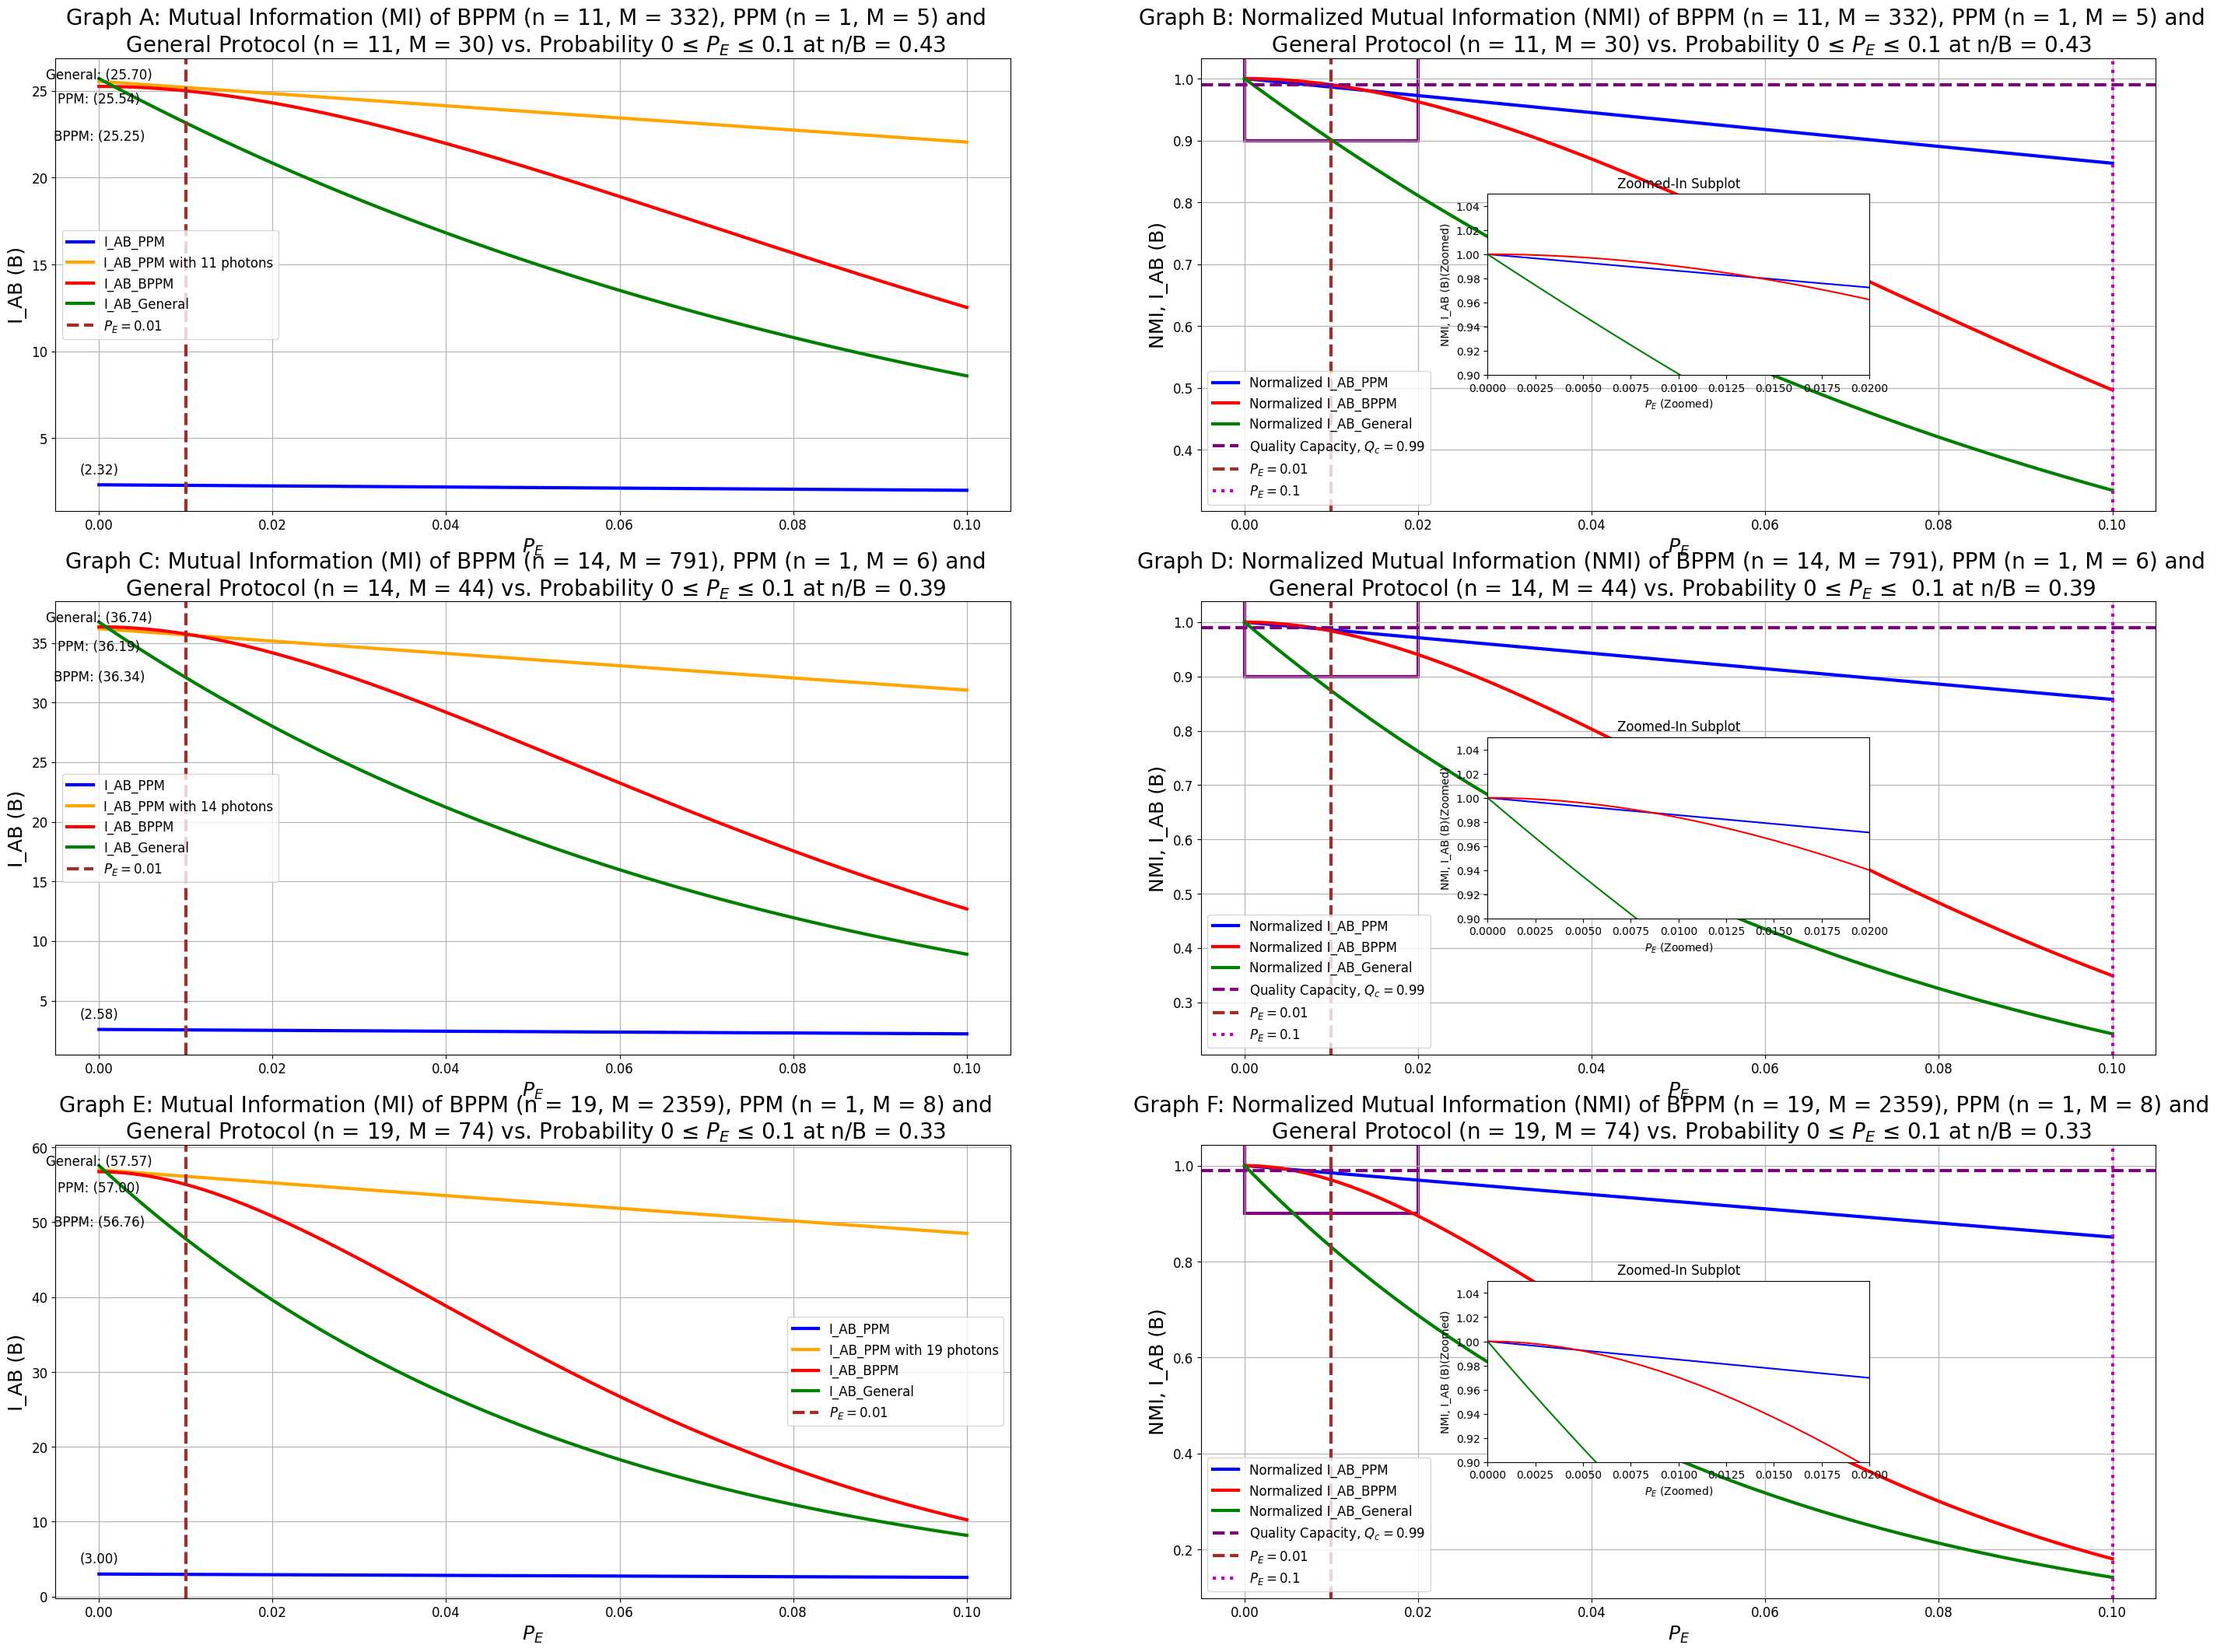

In [47]:
figure, axis = plt.subplots(3,2,figsize=(30,22))

x_zoomed = [0.00, 0.02]
y_zoomed = [0.90, 1.05]

first_point_x = P_list[0]
first_point_PPM_11 = I_AB_PPM_list_11[0]
first_point_PPM_11_11 = I_AB_PPM_11_list_11[0]
first_point_BPPM_11 = I_AB_BPPM_list_11[0]
first_point_General_11 = I_AB_General_list_11[0]

first_point_x = P_list[0]
first_point_PPM_14 = I_AB_PPM_list_14[0]
first_point_PPM_14_14 = I_AB_PPM_14_list_14[0]
first_point_BPPM_14 = I_AB_BPPM_list_14[0]
first_point_General_14 = I_AB_General_list_14[0]

first_point_x = P_list[0]
first_point_PPM_19 = I_AB_PPM_list_19[0]
first_point_PPM_19_19 = I_AB_PPM_19_list_19[0]
first_point_BPPM_19 = I_AB_BPPM_list_19[0]
first_point_General_19 = I_AB_General_list_19[0]

rect_01 = patches.Rectangle((x_zoomed[0], y_zoomed[0]), x_zoomed[1] - x_zoomed[0], y_zoomed[1] - y_zoomed[0], linewidth=3, edgecolor='purple', facecolor='none')
rect_11 = patches.Rectangle((x_zoomed[0], y_zoomed[0]), x_zoomed[1] - x_zoomed[0], y_zoomed[1] - y_zoomed[0], linewidth=3, edgecolor='purple', facecolor='none')
rect_21 = patches.Rectangle((x_zoomed[0], y_zoomed[0]), x_zoomed[1] - x_zoomed[0], y_zoomed[1] - y_zoomed[0], linewidth=3, edgecolor='purple', facecolor='none')

axis[0, 0].plot(P_list, I_AB_PPM_list_11, label='I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[0, 0].plot(P_list, I_AB_PPM_11_list_11, label='I_AB_PPM with 11 photons', color ='orange', linewidth=3, alpha=1)
axis[0, 0].plot(P_list, I_AB_BPPM_list_11, label='I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[0, 0].plot(P_list, I_AB_General_list_11, label='I_AB_General', color ='green', linewidth=3, alpha=1)
axis[0, 0].axvline(x=0.01, label='$P_E = 0.01$', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[0, 0].set_title('Graph A: Mutual Information (MI) of BPPM (n = 11, M = 332), PPM (n = 1, M = 5) and  \n General Protocol (n = 11, M = 30) vs. Probability 0 \u2264 $P_E$ \u2264 0.1 at n/B = 0.43', fontsize=20)
axis[0, 0].set_xlabel('$P_E$', fontsize = 18)
axis[0, 0].set_ylabel('I_AB (B)', fontsize = 18)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)

axis[0, 0].annotate(f'({first_point_PPM_11:.2f})', (first_point_x, first_point_PPM_11), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[0, 0].annotate(f'PPM: ({first_point_PPM_11_11:.2f})', (first_point_x, first_point_PPM_11_11), textcoords="offset points", xytext=(0, -20), ha='center', fontsize = 12)
axis[0, 0].annotate(f'BPPM: ({first_point_BPPM_11:.2f})', (first_point_x, first_point_BPPM_11), textcoords="offset points", xytext=(0, -50), ha='center', fontsize = 12)
axis[0, 0].annotate(f'General: ({first_point_General_11:.2f})', (first_point_x, first_point_General_11), textcoords="offset points", xytext=(0, 00), ha='center', fontsize = 12)

axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=12)

axis[0, 1].plot(P_list, Normalized_I_AB_PPM_list_11, label='Normalized I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[0, 1].plot(P_list, Normalized_I_AB_BPPM_list_11, label='Normalized I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[0, 1].plot(P_list, Normalized_I_AB_General_list_11, label='Normalized I_AB_General', color ='green', linewidth=3, alpha=1)
axis[0, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=3, alpha=1)
axis[0, 1].axvline(x=0.01, label='$P_E = 0.01$', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[0, 1].axvline(x=0.1, label='$P_E = 0.1$', linestyle=':', color='m', linewidth=3, alpha=1)
axis[0, 1].set_title('Graph B: Normalized Mutual Information (NMI) of BPPM (n = 11, M = 332), PPM (n = 1, M = 5) and  \n General Protocol (n = 11, M = 30) vs. Probability 0 \u2264 $P_E$ \u2264 0.1 at n/B = 0.43', fontsize=20)
axis[0, 1].set_xlabel('$P_E$', fontsize = 18)
axis[0, 1].set_ylabel('NMI, I_AB (B)', fontsize = 18)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)

axins = inset_axes(axis[0,1], width='40%', height='40%', loc='center')
axins.set_title('Zoomed-In Subplot', fontsize=12)
axins.plot(P_list, Normalized_I_AB_PPM_list_11, label='Zoomed In', color='blue')
axins.plot(P_list, Normalized_I_AB_BPPM_list_11, label='Zoomed In', color='red')
axins.plot(P_list, Normalized_I_AB_General_list_11, label='Zoomed In', color='green')
axins.set_ylabel('NMI, I_AB (B)(Zoomed)')
axins.set_xlabel('$P_E$ (Zoomed)')
axins.set_xlim(x_zoomed)
axins.set_ylim(y_zoomed)

axis[0, 1].add_patch(rect_01)

axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=12)

axis[1, 0].plot(P_list, I_AB_PPM_list_14, label='I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[1, 0].plot(P_list, I_AB_PPM_14_list_14, label='I_AB_PPM with 14 photons', color ='orange', linewidth=3, alpha=1)
axis[1, 0].plot(P_list, I_AB_BPPM_list_14, label='I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[1, 0].plot(P_list, I_AB_General_list_14, label='I_AB_General', color ='green', linewidth=3, alpha=1)
axis[1, 0].axvline(x=0.01, label='$P_E = 0.01$', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[1, 0].set_title('Graph C: Mutual Information (MI) of BPPM (n = 14, M = 791), PPM (n = 1, M = 6) and  \n General Protocol (n = 14, M = 44) vs. Probability 0 \u2264 $P_E$ \u2264 0.1 at n/B = 0.39', fontsize=20)
axis[1, 0].set_xlabel('$P_E$', fontsize = 18)
axis[1, 0].set_ylabel('I_AB (B)', fontsize = 18)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)

axis[1, 0].annotate(f'({first_point_PPM_14:.2f})', (first_point_x, first_point_PPM_14), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[1, 0].annotate(f'PPM: ({first_point_PPM_14_14:.2f})', (first_point_x, first_point_PPM_14_14), textcoords="offset points", xytext=(0, -20), ha='center', fontsize = 12)
axis[1, 0].annotate(f'BPPM: ({first_point_BPPM_14:.2f})', (first_point_x, first_point_BPPM_14), textcoords="offset points", xytext=(0, -50), ha='center', fontsize = 12)
axis[1, 0].annotate(f'General: ({first_point_General_14:.2f})', (first_point_x, first_point_General_14), textcoords="offset points", xytext=(0, 0), ha='center', fontsize = 12)

axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=12)

axis[1, 1].plot(P_list, Normalized_I_AB_PPM_list_14, label='Normalized I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[1, 1].plot(P_list, Normalized_I_AB_BPPM_list_14, label='Normalized I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[1, 1].plot(P_list, Normalized_I_AB_General_list_14, label='Normalized I_AB_General', color ='green', linewidth=3, alpha=1)
axis[1, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=3, alpha=1)
axis[1, 1].axvline(x=0.01, label='$P_E = 0.01$', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[1, 1].axvline(x=0.1, label='$P_E = 0.1$', linestyle=':', color='m', linewidth=3, alpha=1)
axis[1, 1].set_title('Graph D: Normalized Mutual Information (NMI) of BPPM (n = 14, M = 791), PPM (n = 1, M = 6) and  \n General Protocol (n = 14, M = 44) vs. Probability 0 \u2264 $P_E$ \u2264  0.1 at n/B = 0.39', fontsize=20)
axis[1, 1].set_xlabel('$P_E$', fontsize = 18)
axis[1, 1].set_ylabel('NMI, I_AB (B)', fontsize = 18)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)

axins = inset_axes(axis[1,1], width='40%', height='40%', loc='center')
axins.set_title('Zoomed-In Subplot', fontsize=12)
axins.plot(P_list, Normalized_I_AB_PPM_list_14, label='Zoomed In', color='blue')
axins.plot(P_list, Normalized_I_AB_BPPM_list_14, label='Zoomed In', color='red')
axins.plot(P_list, Normalized_I_AB_General_list_14, label='Zoomed In', color='green')
axins.set_ylabel('NMI, I_AB (B)(Zoomed)')
axins.set_xlabel('$P_E$ (Zoomed)')
axins.set_xlim(x_zoomed)
axins.set_ylim(y_zoomed)

axis[1, 1].add_patch(rect_11)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=12)

axis[2, 0].plot(P_list, I_AB_PPM_list_19, label='I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[2, 0].plot(P_list, I_AB_PPM_19_list_19, label='I_AB_PPM with 19 photons', color ='orange', linewidth=3, alpha=1)
axis[2, 0].plot(P_list, I_AB_BPPM_list_19, label='I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[2, 0].plot(P_list, I_AB_General_list_19, label='I_AB_General', color ='green', linewidth=3, alpha=1)
axis[2, 0].axvline(x=0.01, label='$P_E = 0.01$', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[2, 0].set_title('Graph E: Mutual Information (MI) of BPPM (n = 19, M = 2359), PPM (n = 1, M = 8) and  \n General Protocol (n = 19, M = 74) vs. Probability 0 \u2264 $P_E$ \u2264 0.1 at n/B = 0.33', fontsize=20)
axis[2, 0].set_xlabel('$P_E$', fontsize = 18)
axis[2, 0].set_ylabel('I_AB (B)', fontsize = 18)
axis[2, 0].tick_params(axis='x', labelsize=12)
axis[2, 0].tick_params(axis='y', labelsize=12)

axis[2, 0].annotate(f'({first_point_PPM_19:.2f})', (first_point_x, first_point_PPM_19), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)

axis[2, 0].annotate(f'PPM: ({first_point_PPM_19_19:.2f})', (first_point_x, first_point_PPM_19_19), textcoords="offset points", xytext=(0, -20), ha='center', fontsize = 12)
axis[2, 0].annotate(f'BPPM: ({first_point_BPPM_19:.2f})', (first_point_x, first_point_BPPM_19), textcoords="offset points", xytext=(0, -50), ha='center', fontsize = 12)
axis[2, 0].annotate(f'General: ({first_point_General_19:.2f})', (first_point_x, first_point_General_19), textcoords="offset points", xytext=(0, 0), ha='center', fontsize = 12)


axis[2, 0].grid(True)
axis[2, 0].legend(fontsize=12)



axis[2, 1].plot(P_list, Normalized_I_AB_PPM_list_19, label='Normalized I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[2, 1].plot(P_list, Normalized_I_AB_BPPM_list_19, label='Normalized I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[2, 1].plot(P_list, Normalized_I_AB_General_list_19, label='Normalized I_AB_General', color ='green', linewidth=3, alpha=1)
axis[2, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=3, alpha=1)
axis[2, 1].axvline(x=0.01, label='$P_E = 0.01$', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[2, 1].axvline(x=0.1, label='$P_E = 0.1$', linestyle=':', color='m', linewidth=3, alpha=1)
axis[2, 1].set_title('Graph F: Normalized Mutual Information (NMI) of BPPM (n = 19, M = 2359), PPM (n = 1, M = 8) and  \n General Protocol (n = 19, M = 74) vs. Probability 0 \u2264 $P_E$ \u2264 0.1 at n/B = 0.33', fontsize=20)
axis[2, 1].set_xlabel('$P_E$', fontsize = 18)
axis[2, 1].set_ylabel('NMI, I_AB (B)', fontsize = 18)
axis[2, 1].tick_params(axis='x', labelsize=12)
axis[2, 1].tick_params(axis='y', labelsize=12)


axins = inset_axes(axis[2,1], width='40%', height='40%', loc='center')
axins.set_title('Zoomed-In Subplot', fontsize=12)
axins.plot(P_list, Normalized_I_AB_PPM_list_19, label='Zoomed In', color='blue')
axins.plot(P_list, Normalized_I_AB_BPPM_list_19, label='Zoomed In', color='red')
axins.plot(P_list, Normalized_I_AB_General_list_19, label='Zoomed In', color='green')
axins.set_xlim(x_zoomed)
axins.set_ylim(y_zoomed)
axins.set_ylabel('NMI, I_AB (B)(Zoomed)')
axins.set_xlabel('$P_E$ (Zoomed)')

axis[2, 1].add_patch(rect_21)
axis[2, 1].grid(True)
axis[2, 1].legend(fontsize=12)

figure.set_facecolor("white")
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)

# plt.tight_layout(h_pad=0.125)
# plt.savefig('protocol/MI_EPI_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

Since PPM has only one photon per symobl, we compare n PPM symbols with 1 symbols so mututal information of the other protocols to get the same number of photon. 


Why PPM is so insentivie, expect the same result as other protoocls 

check MI for PPM



## Check PPM MI Value

In [48]:
MI_list = []
K_list = [5,6,8]
for K in K_list:
    MI = np.log2(K)
    MI_list.append(MI)
MI_list

[2.321928094887362, 2.584962500721156, 3.0]

## Check the value of nromalized BBPM and General, non-normalized BPPM and General

In [49]:
I_AB_BPPM_diagonal(P_AB_BPPM_diagonal(11, P_D(11, 0.01, 0, 0, 0)), P_D(11, 0.01, 0, 0, 0))

76177526134.30617

In [50]:
I_AB_BPPM_diagonal(P_AB_BPPM_diagonal(14, P_D(14, 0.01, 0, 0, 0)), P_D(14, 0.01, 0, 0, 0))

49880109.695793934

In [51]:
I_AB_BPPM_diagonal(P_AB_BPPM_diagonal(19, P_D(19, 0.01, 0, 0, 0)), P_D(19, 0.01, 0, 0, 0))

55.05648984528039

In [52]:
I_AB_BPPM_list_19

[56.75545580685535,
 56.73647229565623,
 56.68046981931519,
 56.58875759348978,
 56.462645045143404,
 56.303438779150326,
 56.11243979238873,
 55.89094092105594,
 55.640224507637186,
 55.361560274632296,
 55.056203392795744,
 54.725392732243535,
 54.37034928537996,
 53.99227475113854,
 53.59235027057757,
 53.17173530436321,
 52.731566643168165,
 52.272957542467736,
 51.79699697365356,
 51.304748983813724,
 50.7972521569131,
 50.275519169504996,
 49.7405364344525,
 49.19326382649983,
 48.634634483849446,
 48.06555468022779,
 47.486903762215206,
 46.89953414690078,
 46.304271375202944,
 45.70191421644393,
 45.09323482002617,
 44.47897891028113,
 43.859866020797135,
 43.23658976473419,
 42.609818137846354,
 41.98019385111942,
 41.34833469011437,
 40.714833898288255,
 40.08026058171999,
 39.445160132836904,
 38.81005467087684,
 38.17544349697354,
 37.541803561878005,
 36.90958994446499,
 36.279236339290954,
 35.6511555515843,
 35.0257399981642,
 34.40336221287901,
 33.78437535526371,
 33.1

In [53]:
for P in P_list:
    if P <= 0.01: 
        print(I_AB_BPPM_list_11)  

[25.25049273065605, 25.247805440261065, 25.239819351578728, 25.22663225369497, 25.20834227429887, 25.185047798649684, 25.15684739183297, 25.123839724209944, 25.08612349996544, 25.043797388661524, 24.99695995970907, 24.94570961966791, 24.890144552292757, 24.83036266124024, 24.766461515358145, 24.698538296477, 24.626689749628632, 24.551012135617004, 24.471601185868, 24.38855205948929, 24.301959302469466, 24.211916808951553, 24.118517784513724, 24.021854711395612, 23.92201931560657, 23.819102535857166, 23.71319449425461, 23.60438446870453, 23.49276086696495, 23.37841120229647, 23.261422070657908, 23.14187912939419, 23.019867077368474, 22.895469636488016, 22.768769534577988, 22.63984848955655, 22.508787194865857, 22.37566530611678, 22.24056142890313, 22.10355310774585, 21.964716816125325, 21.82412794756439, 21.681860807722295, 21.537988607464108, 21.392583456868913, 21.245716360141376, 21.097457211393827, 20.94787479126445, 20.79703676434068, 20.645009677355223, 20.491858958125746, 20.3376

In [54]:
for P in P_list:
    if P <= 0.01: 
        print(I_AB_General_list_11)  

[25.702851919186188, 25.437235981873034, 25.174093441402594, 24.913403821167247, 24.655146792612904, 24.39930217432724, 24.14584993113218, 23.894770173181218, 23.646043155061335, 23.399649274899154, 23.15556907347209, 22.913783233323542, 22.674272577883055, 22.437018070590508, 22.202000814025205, 21.969202049039016, 21.738603153894218, 21.51018564340574, 21.283931168087552, 21.059821513303817, 20.83783859842399, 20.617964475982664, 20.40018133084338, 20.184471479367083, 19.97081736858454, 19.75920157537328, 19.549606805638774, 19.342015893499624, 19.13641180047735, 18.932777614689986, 18.73109655005023, 18.531351945467453, 18.33352726405417, 18.13760609233635, 17.943572139468056, 17.7514092364502, 17.561101335353182, 17.3726325085439, 17.185986947916504, 17.001148964127506, 16.818102985834614, 16.636833558939855, 16.457325345836455, 16.279563124659806, 16.103531788542494, 15.929216344872998, 15.75660191455863, 15.585673731292097, 15.416417140822261, 15.248817600228437, 15.0828606771989

In [55]:
for P in P_list:
    if P <= 0.01: 
        print(I_AB_BPPM_list_14)  

[36.343249867790945, 36.33680593009097, 36.31770822617466, 36.28626985330156, 36.24280467117004, 36.187626888591915, 36.121050673192094, 36.043389783216256, 35.95495722055736, 35.85606490414301, 35.74702336285896, 35.628141447207184, 35.499726058931024, 35.36208189786067, 35.21551122526426, 35.06031364300918, 34.89678588786765, 34.72522164032093, 34.54591134723923, 34.359142057839684, 34.16519727234062, 33.96435680275736, 33.75689664529773, 33.543088863841774, 33.32320148400214, 33.09749839728532, 32.866239274887576, 32.62967949067692, 32.38807005293159, 32.14165754441607, 31.890684070397253, 31.63538721421152, 31.37600000001437, 31.1127508623518, 30.845863622211468, 30.5755574692211, 30.30204694967435, 30.025541960079636, 29.74624774593375, 29.46436490543971, 29.18008939789276, 28.893612556475237, 28.605121105205587, 28.314797179801513, 28.022818352223936, 27.72935765867731, 27.434583630854583, 27.138660330217906, 26.841747385120794, 26.544000030579635, 26.24556915051572, 25.946601322

In [56]:
for P in P_list:
    if P <= 0.01: 
        print(I_AB_General_list_14)  

[36.741794217430936, 36.250670136159066, 35.765618019400605, 35.28656892564102, 34.813454626062956, 34.34620759790964, 33.884761017902434, 33.42904875571339, 32.97900536749197, 32.534566089445036, 32.095666831470815, 31.662244170845256, 31.234235345961526, 30.811578250121087, 30.394211425377332, 29.98207405642986, 29.575105964570433, 29.173247601679513, 28.77644004427272, 28.384624987597906, 27.997744739781112, 27.615742216022454, 27.2385609328402, 26.866145002363975, 26.498439126675564, 26.135388592197884, 25.77693926413135, 25.423037580937056, 25.073630548867165, 24.728665736541124, 24.388091269568594, 24.05185582521737, 23.71990862712742, 23.39219944006928, 23.068678564747554, 22.749296832648852, 22.43400560093328, 22.122756747370286, 21.81550266531724, 21.512196258741692, 21.212790937285785, 20.91724061137359, 20.62549968736013, 20.337523062722404, 20.05326612129196, 19.77268472852824, 19.49573522683329, 19.222374430906477, 18.95255962313993, 18.68624854905342, 18.42339941276935, 1

In [57]:
for P in P_list:
    if P <= 0.01: 
        print(I_AB_BPPM_list_19)    

[56.75545580685535, 56.73647229565623, 56.68046981931519, 56.58875759348978, 56.462645045143404, 56.303438779150326, 56.11243979238873, 55.89094092105594, 55.640224507637186, 55.361560274632296, 55.056203392795744, 54.725392732243535, 54.37034928537996, 53.99227475113854, 53.59235027057757, 53.17173530436321, 52.731566643168165, 52.272957542467736, 51.79699697365356, 51.304748983813724, 50.7972521569131, 50.275519169504996, 49.7405364344525, 49.19326382649983, 48.634634483849446, 48.06555468022779, 47.486903762215206, 46.89953414690078, 46.304271375202944, 45.70191421644393, 45.09323482002617, 44.47897891028113, 43.859866020797135, 43.23658976473419, 42.609818137846354, 41.98019385111942, 41.34833469011437, 40.714833898288255, 40.08026058171999, 39.445160132836904, 38.81005467087684, 38.17544349697354, 37.541803561878005, 36.90958994446499, 36.279236339290954, 35.6511555515843, 35.0257399981642, 34.40336221287901, 33.78437535526371, 33.16911372119857, 32.55789325444977, 31.951012058046

In [58]:
for P in P_list:
    if P <= 0.01: 
        print(I_AB_General_list_19)  

[57.570522365381244, 56.513388866550486, 55.474624629312885, 54.45392863226224, 53.45100448803259, 52.46556037658016, 51.49730897935729, 50.54596741437038, 49.61125717210938, 48.69290405233735, 47.790638101731645, 46.90419355236335, 46.03330876100736, 45.17772614926981, 44.33719214452573, 43.511457121653805, 42.70027534556065, 41.90340491448376, 41.1206077040625, 40.35164931216972, 39.59629900449176, 38.854329660850105, 38.125517722252724, 37.40964313866857, 36.70648931751359, 36.0158430728411, 35.33749457522722, 34.671237302341275, 34.01686799019498, 33.37418658505893, 32.7429961960407, 32.12310304831363, 31.514316436990274, 30.916448681630328, 30.329315081376468, 29.752733870709513, 29.186526175814322, 28.63051597155026, 28.084530039016506, 27.548397923706567, 27.02195189424249, 26.505026901683348, 25.997460539398553, 25.49909300350051, 25.0097670538285, 24.529327975476434, 24.057623540858565, 23.594503972304715, 23.139821905179858, 22.69343235151945, 22.255192664175638, 21.824962501

In [59]:
for P in P_list:
    if P <= 0.01: 
        print(Normalized_I_AB_BPPM_list_11)  

[0.9999999998931425, 0.99989357462757, 0.9995773000595182, 0.9990550489484997, 0.9983307074637913, 0.9974081719752692, 0.9962913459745051, 0.994984137122322, 0.9934904544190659, 0.9918142054939111, 0.989959294009725, 0.9879296171799552, 0.985729063394256, 0.9833615099495049, 0.9808308208830818, 0.9781408449052498, 0.9752954134276509, 0.9722983386849603, 0.9691534119467938, 0.9658644018171417, 0.9624350526185244, 0.9588690828582996, 0.9551701837744629, 0.9513420179584975, 0.9473882180527567, 0.943312385520053, 0.9391180894831025, 0.9348088656315479, 0.9303882151944126, 0.9258596039757717, 0.9212264614516249, 0.9164921799258705, 0.9116601137434729, 0.9067335785588293, 0.9017158506575172, 0.8966101663295777, 0.8914197212925361, 0.886147670162491, 0.8807971259715182, 0.8753711597298257, 0.8698728000310016, 0.8643050326988724, 0.8586708004743991, 0.8529730027412031, 0.8472144952882724, 0.8413980901084426, 0.8355265552313544, 0.8296026145895234, 0.8236289479162976, 0.8176081906744145, 0.8115

In [60]:
for P in P_list:
    if P <= 0.01: 
        print(Normalized_I_AB_General_list_11)  

[0.9999896174695224, 0.9896556210561003, 0.9794178540871917, 0.9692755199043135, 0.9592278276091213, 0.9492739920279365, 0.939413233676439, 0.929644778724547, 0.9199678589614768, 0.9103817117609676, 0.900885580046699, 0.8914787122578677, 0.8821603623149563, 0.8729297895856595, 0.8637862588510002, 0.8547290402716043, 0.845757409354157, 0.8368706469180318, 0.8280680390620796, 0.8193488771316043, 0.8107124576854903, 0.8021580824635165, 0.7936850583538232, 0.7852926973605603, 0.7769803165716899, 0.7687472381269637, 0.7605927891860674, 0.7525163018969188, 0.744517113364146, 0.736594565617714, 0.7287480055817278, 0.7209767850433862, 0.7132802606221086, 0.7056577937388115, 0.6981087505853542, 0.6906325020941423, 0.6832284239078855, 0.675895896349523, 0.6686343043922953, 0.6614430376299861, 0.654321490247308, 0.6472690609904559, 0.6402851531378058, 0.6333691744707739, 0.6265205372448325, 0.6197386581606686, 0.6130229583355089, 0.6063728632745842, 0.5997878028427577, 0.5932672112362916, 0.58681

In [61]:
for P in P_list:
    if P <= 0.01: 
        print(Normalized_I_AB_BPPM_list_14)  

[0.9999999998216133, 0.9998226921311268, 0.9992972106735694, 0.9984321704533949, 0.9972362074538865, 0.9957179672643325, 0.993886094340746, 0.9917492218748961, 0.9893159622471849, 0.986594898039761, 0.9835945735871798, 0.9803234870425522, 0.9767900829380651, 0.9730027452193273, 0.9689697907338738, 0.9646994631546956, 0.9601999273204694, 0.9554792639747249, 0.9505454648868061, 0.9454064283381854, 0.9400699549581218, 0.9345437438933973, 0.9288353892972256, 0.9229523771231465, 0.9169020822100522, 0.9106917656451435, 0.9043285723919875, 0.8978195291713341, 0.8911715425828711, 0.8843913974563907, 0.8774857554214315, 0.8704611536846878, 0.8633240040050506, 0.8560805918563502, 0.8487370757683944, 0.8412994868371495, 0.8337737283952674, 0.8261655758345785, 0.8184806765723476, 0.8107245501535714, 0.8029025884817239, 0.7950200561708116, 0.7870820910117337, 0.77909370454634, 0.7710597827427685, 0.7629850867658863, 0.7548742538370077, 0.7467317981771425, 0.7385621120284284, 0.7303694667484607, 0.7

In [62]:
for P in P_list:
    if P <= 0.01: 
        print(Normalized_I_AB_General_list_14)  

[0.9999865497970405, 0.9866198243549742, 0.9734183571147345, 0.9603802717230097, 0.9475037112236788, 0.9347868378771864, 0.9222278329813903, 0.9098248966939068, 0.8975762478559304, 0.8854801238175023, 0.8735347802642497, 0.8617384910455488, 0.8500895480041359, 0.8385862608071213, 0.8272269567784343, 0.8160099807326457, 0.8049336948101983, 0.7939964783140118, 0.7831967275474485, 0.7725328556536557, 0.7620032924562384, 0.7516064843012911, 0.7413408939007411, 0.731205000177029, 0.7211972981090852, 0.7113162985796155, 0.7015605282236793, 0.6919285292785398, 0.6824188594348001, 0.673030091688786, 0.6637608141962009, 0.6546096301270042, 0.645575157521546, 0.6366560291479079, 0.6278508923604722, 0.6191584089597006, 0.6105772550530976, 0.6021061209173812, 0.593743710861818, 0.5854887430927446, 0.5773399495792387, 0.5692960759199575, 0.5613558812111096, 0.5535181379155724, 0.5457816317331379, 0.53814516147187, 0.530607538920586, 0.5231675887224287, 0.5158241482495457, 0.5085760674788421, 0.5014

In [63]:
for P in P_list:
    if P <= 0.01: 
        print(Normalized_I_AB_BPPM_list_19)  

[0.9999999996623496, 0.9996655206079074, 0.9986787876934065, 0.9970628685805982, 0.9948408346543274, 0.9920357075757763, 0.9886704101963121, 0.9847677215805818, 0.9803502358997811, 0.9754403249678855, 0.970060104205099, 0.9642314018233176, 0.9579757310389626, 0.9513142651280836, 0.9442678151482452, 0.9368568101603947, 0.9291012797926295, 0.9210208389957787, 0.9126346748484373, 0.9039615352766435, 0.8950197195601717, 0.8858270705044147, 0.8764009681629507, 0.8667583250022595, 0.856915582405621, 0.8468887084189837, 0.8366931966467515, 0.8263440662104639, 0.8158558626882759, 0.8052426599575021, 0.7945180628670719, 0.7836952106706591, 0.7727867811554093, 0.7618049954047396, 0.7507616231374252, 0.7396679885684947, 0.728534976740663, 0.7173730402782358, 0.7061922065181561, 0.6950020849758333, 0.6838118751058437, 0.6726303743202864, 0.6614659862297753, 0.6503267290744625, 0.6392202443145417, 0.6281538053517044, 0.6171343263550545, 0.6061683711666571, 0.5952621622638026, 0.5844215897565321, 0.

In [64]:
for P in P_list:
    if P <= 0.01: 
        print(Normalized_I_AB_General_list_19)  

[0.9999814762860274, 0.9816194070645075, 0.9635764060148833, 0.9458472444920463, 0.928426774342678, 0.9113099267463786, 0.8944917110722899, 0.8779672137510717, 0.8617315971620189, 0.8457800985351149, 0.830108028867881, 0.8147107718567819, 0.7995837828430624, 0.7847225877727801, 0.7701227821709117, 0.7557800301293031, 0.7416900633083362, 0.7278486799521183, 0.714251743917014, 0.700895183713387, 0.6877749915603432, 0.6748872224533545, 0.6622279932445583, 0.6497934817356165, 0.6375799257829343, 0.625583622415114, 0.6138009269624801, 0.6022282521985036, 0.5908620674930162, 0.5796988979770142, 0.5687353237189571, 0.5579679789123645, 0.5473935510746145, 0.53700878025676, 0.526810458264253, 0.5167954278884258, 0.5069605821485812, 0.49730286354458236, 0.48781926331977676, 0.47850682073415296, 0.4693626223475674, 0.4603838013129459, 0.45156753667929567, 0.4429110527044337, 0.434411618177289, 0.4260665457496521, 0.41787319127726874, 0.40982895317013096, 0.4019312717518761, 0.39417762862814415, 0